# Introduction

Throughout the lesson, we'll use a dataset about house characteristics and sale prices. The houses were sold between 2006 and 2010 in Ames, Iowa.

Professor Dean DeCock collected the data — he described the data collection process in a [paper](https://www.tandfonline.com/doi/abs/10.1080/10691898.2011.11889627) he published in the Journal of Statistics Education. We can find the documentation for the dataset at [this link](https://s3.amazonaws.com/dq-content/307/data_description.txt).

We slightly modified the dataset for teaching purposes. You can download the original dataset from here and the modified version from our interface.

In [21]:
import numpy as np 
import pandas as pd
from csv import reader
import matplotlib.pyplot as plt 

housing = pd.read_csv('housing.csv')
housing.head()

#  Below, we see the first five rows:

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice,Year,Rooms
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,NaN,NaN,0,5,2010,WD,Normal,215000,1999 or older,7 rooms or more
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,MnPrv,NaN,0,6,2010,WD,Normal,105000,1999 or older,6 rooms or less
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,NaN,Gar2,12500,6,2010,WD,Normal,172000,1999 or older,6 rooms or less
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,NaN,NaN,0,4,2010,WD,Normal,244000,1999 or older,7 rooms or more
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,MnPrv,NaN,0,3,2010,WD,Normal,189900,1999 or older,6 rooms or less


Here is a dictionnary that describes some columns in our housing dataset :

(columns):

* SalePrice: price of the sale in USD
* Gr Liv Area: above grade (ground) living area in square feet
* Overall Qual: quality ratings of the overall material and finish of the house
* Garage Area: garage area in square feet
* Rooms : number of rooms

Let's start first by plotting only two of these variables: SalePrice and Gr Liv Area

In [22]:
print(housing.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 84 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2440 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot Shape        2930 non-null   object 
 9   Land Contour     2930 non-null   object 
 10  Utilities        2930 non-null   object 
 11  Lot Config       2930 non-null   object 
 12  Land Slope       2930 non-null   object 
 13  Neighborhood     2930 non-null   object 
 14  Condition 1      2930 non-null   object 
 15  Condition 2      2930 non-null   object 
 16  Bldg Type        2930 non-null   object 
 17  House Style   

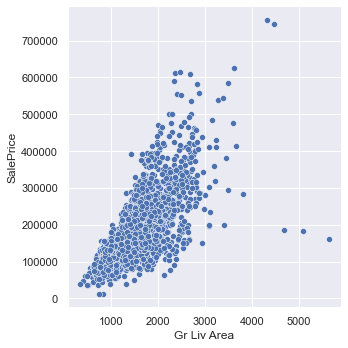

In [23]:
import seaborn as sns

sns.set_theme()
sns.relplot(data=housing, x='Gr Liv Area', y='SalePrice')
plt.show()

Inspecting the scatter plot, we can see that the two variables are positively corralated. The greater the living area, the bigger the sale price (typically, not always).

Now, let's add Overall Qual variable on the graph by using a color representation

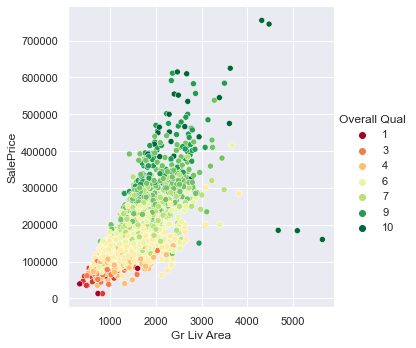

In [24]:
sns.set_theme()
sns.relplot(data=housing, x='Gr Liv Area', y='SalePrice', hue='Overall Qual', palette='RdYlGn')
plt.show()

From the scatter plot above, we observe the following :

* Houses with smaller living areas aboveground typically have a lower overall quality.
* Very rarely, we see high-quality houses with a high living area aboveground (over 4,000 square feet) sold at relatively low prices (under 200,000 USD).

Now, let's add the Garage Area variable on the graph by using a size representation. The size range should be between 1 and 300; corresponding to the minimal and maximal size of the column Garage.

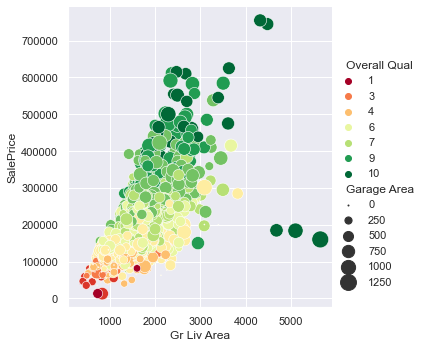

In [25]:
sns.set_theme()
sns.relplot(data=housing, x='Gr Liv Area', y='SalePrice', hue='Overall Qual', palette='RdYlGn', size='Garage Area',
            sizes=(1,300))
plt.show()

We observe that houses with an overall quality of nine or ten typically have garage areas greater than 500 square feet, living areas aboveground greater than 2,000 feet, and sell for more than 400,000 USD. 

Now, let's add the Rooms column on the graph by using a shape representation.

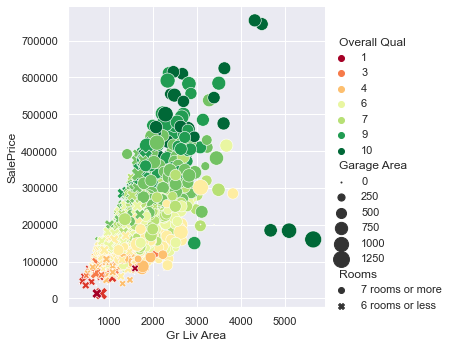

In [26]:
sns.set_theme()
sns.relplot(data=housing, x='Gr Liv Area', y='SalePrice', hue='Overall Qual', palette='RdYlGn', size='Garage Area', 
            sizes=(1,300), style = 'Rooms')
plt.show()

So far, we've added the following variables on our graph:

* Gr Liv Area: represented with x-coordinates.
* SalePrice: represented with y-coordinates.
* Overal Qual: represented with color.
* Garage Area: represented with size.
* Rooms: represented with shape.

We'll add one more variable by spatially separating the graph based on the values in the Year variable. This variable describes the year when a house was built, and it has only two values: 1999 or older and 2000 or newer. For each value, we'll build a separate graph that will display the five variables we've already plotted.

Below, we add the Year column using the col parameter:

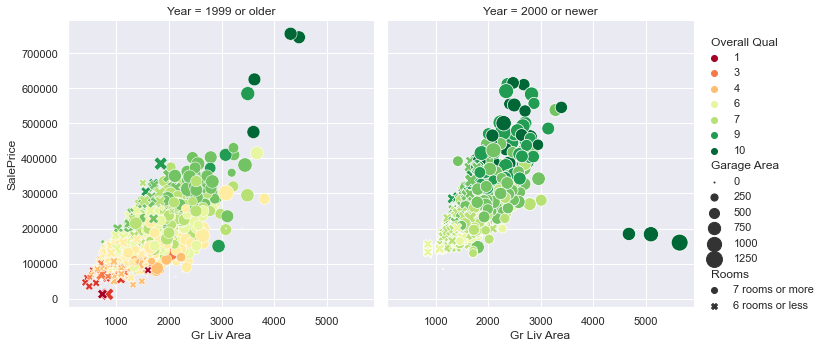

In [27]:
sns.set_theme()
sns.relplot(data=housing, x='Gr Liv Area', y='SalePrice',
            hue='Overall Qual', palette='RdYlGn',
            size='Garage Area', sizes=(1,300),
            style='Rooms', col='Year')
plt.show()

Now, we will add the Year column by building two different plots based on the values in this column.

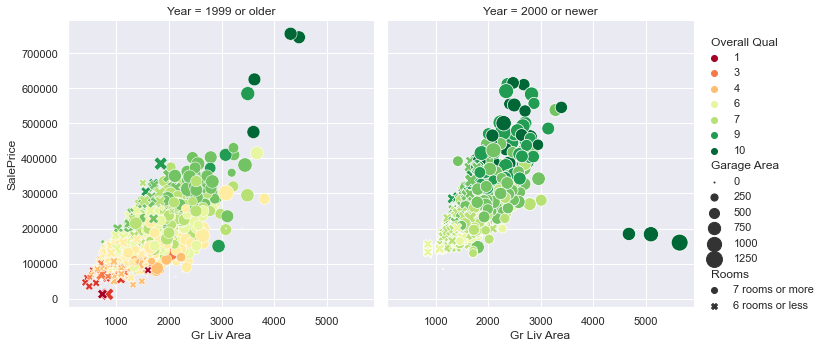

In [28]:
sns.set_theme()
sns.relplot(data=housing, x='Gr Liv Area', y='SalePrice', hue='Overall Qual', palette='RdYlGn', 
            size='Garage Area', sizes=(1,300), style='Rooms', col ='Year')
plt.show()

From the result above, we obseve the following : 
    
* Most houses built in 2000 or later have a living area aboveground between 1,000 and 3,000 square feet and sell for more than 100,000 USD. 

* Most of the houses with an overall quality rating of four or less were built in 1999 or earlier, have low garage area and six rooms or less.